# Codes python de la SAE Graphes
(ce fichier n'est pas dans le rendu final)

In [1]:
# les imports nécessaires
import json
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def nettoyageNoms(liste_noms):
    """fonction clarifiant les noms d'une liste d'une de noms, supprimant les caractères et informations inutiles

    Args:
        liste_noms (dict): liste de noms à nettoyer

    Returns:
        list : liste de noms sans caractères parasites 
    """
    nomsClairs = []
    for nom in liste_noms:
        sansCrochets = nom.replace('[', '').replace(']', '').replace("'", '')
        index = len(sansCrochets)
        if "(" in sansCrochets:
            index = min(index, sansCrochets.index("("))
        if "<" in sansCrochets:
            index = min(index, sansCrochets.index("<"))
        if "|" in sansCrochets:
            index = min(index, sansCrochets.index("|"))
        nomPropre = sansCrochets[:index]
        nomsClairs.append(nomPropre.strip())
    return nomsClairs

def extraction(filename):
    """fonction d'extraction des données d'un fichier contenant des informations lisibles par Python

    Args:
        filename (string): nom du fichier à lire

    Returns:
        dict : dictionnaire avec un nom de film en clé et son casting (liste de noms) en valeur
    """
    dico = {}
    with open(filename, 'r') as file:
        for ligne in file.readlines():
            ligneConvertie = json.loads(ligne)
            if ligneConvertie["cast"] :
                dico[ligneConvertie["title"]] = nettoyageNoms(ligneConvertie["cast"])
                #print(ligneConvertie["title"], "->", dico[ligneConvertie["title"]], "\n\n")
    return dico

def construction(donnees):
    """fonction de construction d'un graphe en fonction des données d'un dicionnaire

    Args:
        donnees (dict): dictionnaire avec un nom de film en clé et son casting (liste de noms) en valeur

    Returns:
        graph: graphe reliant les informationns du dictionnaire placé en paramètre
    """
    graphe = nx.Graph()
    for casting in donnees.values():
        for acteurI in casting:
            for acteurII in casting:
                if acteurI != acteurII:
                    graphe.add_edge(acteurI, acteurII)
    return graphe

def display(G):
    """fonction d'affichage d'un graphique afin de le voir visuellement

    Args:
        G (graph): graphe sur lequel se base l'image renvoyée
    """
    options = {
    'with_labels': True,
    'node_size': 1500,
    'node_color': "skyblue",
    'node_shape': "s",
    'alpha': 0.7, 
    'linewidths': 10,
    }
    nx.draw(G, **options)

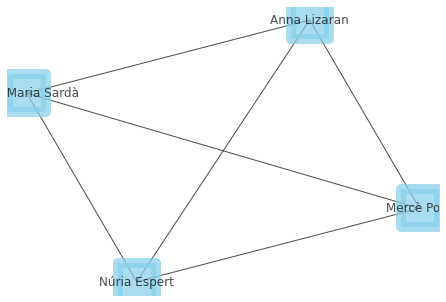

In [3]:
globalData = extraction("data.json")
smallData = {"Actrius": ['Núria Espert', 'Rosa Maria Sardà', 'Anna Lizaran', 'Mercè Pons']}

graphe = construction(globalData)
smallGraphe = construction(smallData)
display(smallGraphe)

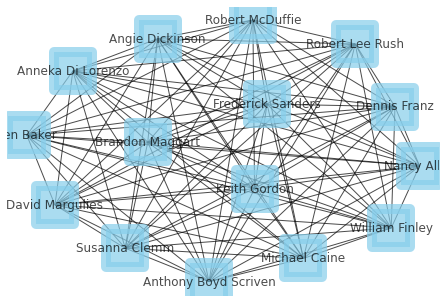

In [4]:
biggerData = {"Dressed to Kill (1980 film)": ['Michael Caine', 'Angie Dickinson', 'Nancy Allen', 'Keith Gordon', 'Dennis Franz', 'David Margulies', 'Ken Baker', 'Susanna Clemm', 'Brandon Maggart', 'Anneka Di Lorenzo', 'William Finley', 'Robert Lee Rush', 'Anthony Boyd Scriven', 'Robert McDuffie', 'Frederick Sanders']}
biggerGraphe = construction(biggerData)
display(biggerGraphe)

Echauffement fini !

In [5]:
def collaborateursCommuns(G, acteurI, acteurII):
    """fonction de recherche déterminants quels sont les artistes ayant collaboré avec les deux acteurs en paramètre

    Args:
        acteurI (string): acteur
        acteurII (string): acteur

    Returns:
        set: liste des noms des acteurs ayant déjà travaillé avec les deux acteurs placés en paramètre 
    """
    if acteurI not in G.nodes:
        print(acteurI,"est un illustre inconnu")
        return None
    if acteurII not in G.nodes:
        print(acteurII,"est un illustre inconnu")
        return None
    collaborateurs_en_commun = set()
    for collaborateur in G[acteurI]:
        if collaborateur in G[acteurII]:
            collaborateurs_en_commun.add(collaborateur)
    return collaborateurs_en_commun

In [6]:
print(collaborateursCommuns(graphe, 'Núria Espert', 'Rosa Maria Sardà'))
print(collaborateursCommuns(graphe, "Emma Watson", "Dany Boon"))
print(collaborateursCommuns(graphe, "Igor", "Louis de Funès"))

{'Mercè Pons', 'Montserrat Salvador', 'Xabier Elorriaga', 'Anna Lizaran'}
{'Luke Evans', 'Daniel Brühl'}
Igor est un illustre inconnu
None


### 3 - Collaborateurs proches

In [7]:
#code fourni par les professeurs

def collaborateurs_proches(G,u,k):
    """Fonction renvoyant l'ensemble des acteurs à distance au plus k de l'acteur u dans le graphe G. La fonction renvoie None si u est absent du graphe.
    
    Parametres:
        G (graph): le graphe
        u (string): le sommet de départ
        k (int): la distance depuis u
    """
    if u not in G.nodes:
        print(u,"est un illustre inconnu")
        return None
    collaborateurs = set()
    collaborateurs.add(u)
    #print(collaborateurs)
    for i in range(k):
        collaborateurs_directs = set()
        for c in collaborateurs:
            for voisin in G.adj[c]:
                if voisin not in collaborateurs:
                    collaborateurs_directs.add(voisin)
        collaborateurs = collaborateurs.union(collaborateurs_directs)
    return collaborateurs

In [8]:
#print(collaborateurs_proches(graphe, 'Rosa Maria Sardà', 2))

dico = {"a":1, 'b':2, 'c':3}

In [12]:
print(collaborateurs_proches(graphe,"Mahdi Chaouch", 2))

{'Nicky Charriére', 'Corinne Dacla', 'André Falcon', 'Michel Amphoux', 'Gustavo Biosca', 'Carlos Ronda', 'Jean-François Balmer', 'Enrique Tusquets', 'Miguel', 'Margo Lion', 'Charlotte Gainsbourg', 'Tsilla Chelton', 'Rafael Alcántara', 'Jacques Richard', 'Dominique Lavanant', 'Fernando Millet', 'Gabriel Alonso', 'Jacques Spiesser', 'Sylvie Joly', 'Jacques Portet', 'Isabelle Huppert', 'Enrique Martí', 'Jérôme Zucca', 'Odile Michel', 'Alejo del Peral', 'Puchades', 'Francisco Javier Marcet', 'Guy Tréjan', 'Monette Dinay', 'Hubert Noël', 'César Ojinaga', 'Michel Bedetti', 'Jeannine Mestre', 'Dominique Laffin', 'Ludovic Lutard\t...', 'Béatrice Arnac', 'Sady Rebbot', 'Xabier Elorriaga', 'Suzanne Flon', 'Jean-Louis Trintignant', 'Jazia Klibi', 'José Ramón Giner', 'Michel Blanc', 'Annie Bertin', 'Robert Le Fort', 'Pierre-Olivier Scotto', 'Louis de Funès', 'Claude Rich', 'Michel Piccoli', 'Nicolas Silberg', 'José Isbert', 'Luis Molowny', 'Laurent Gamelon', 'Harald Wolff', 'Miguel Ángel Valdivies